In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
# import sklearn.preprocessing as sk
from collections import Counter

# from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [2]:
exp1_data = pd.read_csv("allTogetherSep.csv")
exp2_data = pd.read_csv("allTogetherOct.csv")

In [3]:
exp1_data_T = pd.DataFrame.transpose(exp1_data).reset_index()
exp2_data_T = pd.DataFrame.transpose(exp2_data).reset_index()
exp1_data_T

,index,0,1,2,3,4,5,6,7,8,...,286,287,288,289,290,291,292,293,294,295
0,Basic information,What is your gender?,Please indicate your age,Please indicate your ethnic background (optional),What is your highest level of education?,How would you rate your technology expertise?,How do you feel about including technology in ...,How would you rate your experience with smart ...,Propensity Questions,I usually trust machines until there is a reas...,...,exp2-st2-sec2,#ignore an alert,exp1-st1-sec1,exp1-st1-sec2,exp1-st2-sec1,exp1-st2-sec2,exp2-st1-sec1,exp2-st1-sec2,exp2-st2-sec1,exp2-st2-sec2
1,1,2,1,7,4,2,0,3,NaN,3,...,17,NaN,9,11,13,1,0,0,0,0
2,2,1,1,4,4,2,1,2,NaN,4,...,17,NaN,0,0,1,0,0,0,0,0
3,3,2,1,7,4,2,1,2,NaN,4,...,16,NaN,0,0,0,0,0,0,0,0
4,4,2,1,4,4,3,1,2,NaN,4,...,15,NaN,1,0,0,0,0,0,0,1
5,5,2,1,7,4,2,1,2,NaN,4,...,2,NaN,7,9,8,14,5,10,15,15
6,6,2,1,7,3,2,0,2,NaN,5,...,5,NaN,0,0,3,9,6,7,7,8
7,7,1,1,4,4,2,1,1,NaN,4,...,6,NaN,4,2,5,2,0,1,0,9
8,9,1,1,4,2,2,1,2,NaN,4,...,17,NaN,5,0,4,1,1,0,0,0
9,10,1,1,1,5,2,0,1,NaN,5,...,9,NaN,8,11,13,16,11,7,9,8


In [4]:
n_participant = exp1_data_T.shape[0]

exp1_trust = exp1_data_T.values[1:n_participant,79:87].astype(int)
exp2_trust = exp2_data_T.values[1:n_participant,79:87].astype(int)
#exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_trust = np.vstack((exp1_trust,np.hstack((exp2_trust[:,4:],exp2_trust[:,:4])))).astype(int)
exp_trust.shape

(36, 8)

In [5]:
exp2_data_T = pd.DataFrame.transpose(exp2_data).reset_index()
#exp2_data_T

In [6]:
exp1_demo = exp1_data_T.values[1:n_participant,1:8]
exp2_demo = exp2_data_T.values[1:n_participant,1:8]
#exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_demo = np.vstack((exp1_demo,exp2_demo)).astype(int)
exp_demo.shape

(36, 7)

[1 2]


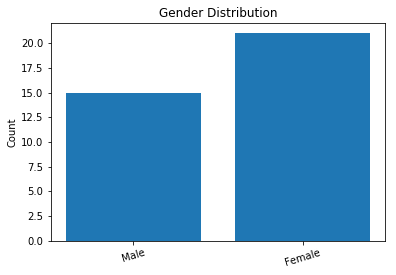

(None, Counter({1: 15, 2: 21}))

In [7]:
gender = Counter(exp_demo[:,0])
print(np.array(sorted(gender.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(gender.keys()))
plt.bar(x, np.array(sorted(gender.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Male','Female'),
           rotation=17)
plt.title("Gender Distribution")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_demo[:,0]))

[1 2 3]


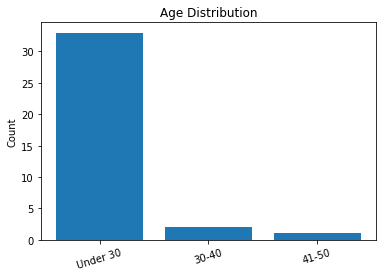

(None, Counter({1: 33, 2: 2, 3: 1}))

In [8]:
age = Counter(exp_demo[:,1])
print(np.array(sorted(age.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(age.keys()))
plt.bar(x, np.array(sorted(age.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Under 30','30-40','41-50'),
           rotation=17)
plt.title("Age Distribution")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_demo[:,1]))

[1 3 4 6 7 8]


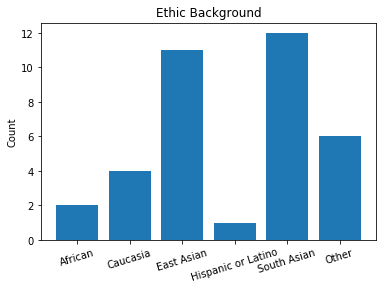

(None, Counter({1: 2, 3: 4, 4: 11, 6: 1, 7: 12, 8: 6}))

In [9]:
ethic = Counter(exp_demo[:,2])
print(np.array(sorted(ethic.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(ethic.keys()))
plt.bar(x, np.array(sorted(ethic.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('African','Caucasia','East Asian','Hispanic or Latino','South Asian','Other'),
           rotation=17)
plt.title("Ethic Background")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_demo[:,2]))

[2 3 4 5 7]


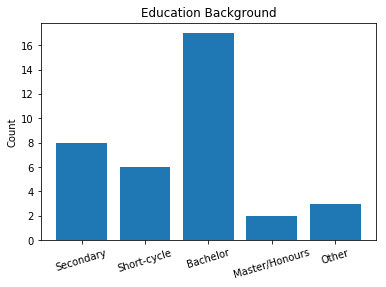

(None, Counter({2: 8, 3: 6, 4: 17, 5: 2, 7: 3}))

In [10]:
edu = Counter(exp_demo[:,3])
print(np.array(sorted(edu.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(edu.keys()))
plt.bar(x, np.array(sorted(edu.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Secondary','Short-cycle','Bachelor','Master/Honours','Other'),
           rotation=17)
plt.title("Education Background")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_demo[:,3]))

[2 3]


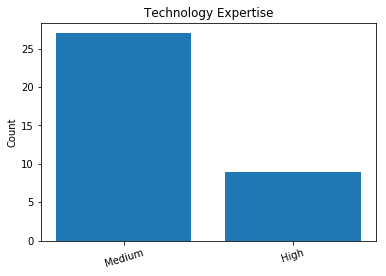

(None, Counter({2: 27, 3: 9}))

In [11]:
# technology expertise
te = Counter(exp_demo[:,4])
print(np.array(sorted(te.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(te.keys()))
plt.bar(x, np.array(sorted(te.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Medium','High'),
           rotation=17)
plt.title("Technology Expertise")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_demo[:,4]))

[0 1]


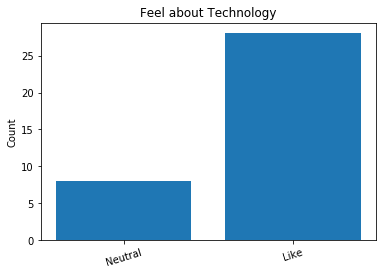

(None, Counter({0: 8, 1: 28}))

In [12]:
# Feel about technology in your life...

tl = Counter(exp_demo[:,5])
print(np.array(sorted(tl.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(tl.keys()))
plt.bar(x, np.array(sorted(tl.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Neutral','Like'),
           rotation=17)
plt.title("Feel about Technology")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_demo[:,5]))

# Introductions:
There are 4 stages in each experiment: A,B,C,D; Each stage has two sections with identical system settings

System settings in the experiment one: 

|Events| A-1 | A-2 | B-1 | B-2 | C-1 | C-2 | D-1 | D-2 |          
| :- |-: |-: |-: |-: |-: |-: |-: |-: |
|# True Alerts |12|12|14|14|12|12|14|14|
|# False Alerts| 5| 5| 6| 6| 2| 2| 3| 3|
|# Misses      | 3| 2| 0| 0| 2| 2| 0| 0|

The experiment two has the same system settings to experiment 1, but in a different order, swapped AB and CD

|Events| C-1 | C-2 | D-1 | D-2 | A-1 | A-2 | B-1 | B-2 |          
| :- |-: |-: |-: |-: |-: |-: |-: |-: |
|# True Alerts |12|12|14|14|12|12|14|14|
|# False Alerts| 2| 2| 3| 3| 5| 5| 6| 6|
|# Misses      | 2| 2| 0| 0| 3| 2| 0| 0|

Each experiment has 18 validate results

# Trust Scores

In [13]:
exp1_trust = exp1_data_T.values[1:n_participant,79:87].astype(int)
exp2_trust = exp2_data_T.values[1:n_participant,79:87].astype(int)
#exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_trust = np.vstack((exp1_trust,np.hstack((exp2_trust[:,4:],exp2_trust[:,:4])))).astype(int)
exp_trust.shape

(36, 8)

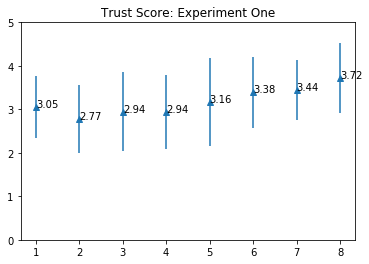

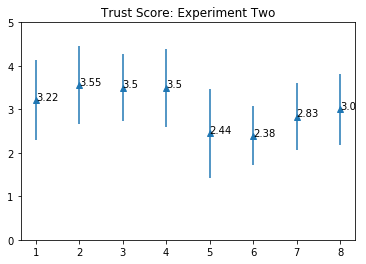

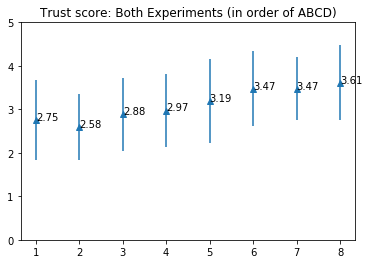

In [91]:
# exp1 mean & std
x = np.arange(1,9)
y = np.array(exp1_trust.mean(axis=0))
e = np.array(exp1_trust.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,5])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')

plt.title("Trust Score: Experiment One")
plt.show()

# exp1_trust_ms = np.vstack((exp1_trust.mean(axis=0),exp1_trust.std(axis=0)))

# exp2 mean & std
x = np.arange(1,9)
y = np.array(exp2_trust.mean(axis=0))
e = np.array(exp2_trust.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,5])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
    
plt.title("Trust Score: Experiment Two")
plt.show()
# exp2_trust_ms = np.vstack((exp2_trust.mean(axis=0),exp2_trust.std(axis=0)))

# overall mean & std
x = np.arange(1,9)
y = np.array(exp_trust.mean(axis=0))
e = np.array(exp_trust.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,5])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("Trust score: Both Experiments (in order of ABCD)")
plt.show()

# np.vstack((exp_trust.mean(axis=0),exp_trust.std(axis=0)))

## RQ1a: Trust Scores between first section with same section in the other exp (ind t-test)

In [17]:
# check if there is a training period

exp_trust_1st_sec = exp1_trust[:, 0].T.ravel()
exp_trust_5th_sec = exp2_trust[:, 4].T.ravel()

print('A-1 Section in exp1: Mean:',exp_trust_1st_sec.mean(),' Std:',exp_trust_1st_sec.std())
print('A-1 Section in exp2: Mean:',exp_trust_5th_sec.mean(),' Std:',exp_trust_5th_sec.std())
print(sp.ttest_ind(exp_trust_1st_sec,exp_trust_5th_sec),'\n')

exp_trust_1st_sec = exp2_trust[:, 0].T.ravel()
exp_trust_5th_sec = exp1_trust[:, 4].T.ravel()

print('C-1 Section in exp2: Mean:',exp_trust_1st_sec.mean(),' Std:',exp_trust_1st_sec.std())
print('C-1 Section in exp1: Mean:',exp_trust_5th_sec.mean(),' Std:',exp_trust_5th_sec.std())
print(sp.ttest_ind(exp_trust_1st_sec,exp_trust_5th_sec))

A-1 Section in exp1: Mean: 3.05555555556  Std: 0.704920974469
A-1 Section in exp2: Mean: 2.44444444444  Std: 1.01227039768
Ttest_indResult(statistic=2.0426487199475694, pvalue=0.048902381285184704) 

C-1 Section in exp2: Mean: 3.22222222222  Std: 0.916245694582
C-1 Section in exp1: Mean: 3.16666666667  Std: 1.01379375505
Ttest_indResult(statistic=0.16762808104168964, pvalue=0.86786897725947454)


## RQ1b: Trust Scores between first and second section in all stages (related t-test)

In [18]:
# check if there is a training period

exp_trust_sec1 = exp_trust[:, np.r_[0,2,4,6]].T.ravel()
exp_trust_sec2 = exp_trust[:, np.r_[1,3,5,7]].T.ravel()

print('1st Section: Mean:',exp_trust_sec1.mean(),' Std:',exp_trust_sec1.std())
print('2nd Section: Mean:',exp_trust_sec2.mean(),' Std:',exp_trust_sec2.std())
print(sp.ttest_rel(exp_trust_sec1,exp_trust_sec2))

1st Section: Mean: 3.07638888889  Std: 0.913478251209
2nd Section: Mean: 3.15972222222  Std: 0.9254367921
Ttest_relResult(statistic=-1.3286956381223773, pvalue=0.18606475613655418)


## RQ2b Self-reported trust and system performance
### Trust Scores vs System Performance (Hi FA vs Low FA ratio) – related t-test + wilcoxon

In [19]:
# within subject exp1: high/low false rate

exp1_trust_hifalse = exp1_trust[:, np.r_[0:4]].T.ravel()
exp1_trust_lofalse = exp1_trust[:, np.r_[4:8]].T.ravel()

print('Sections in exp1 with high FA: Mean:', exp1_trust_hifalse.mean(),' Std:',exp1_trust_hifalse.std())
print('Sections in exp1 with low FA: Mean:', exp1_trust_lofalse.mean(),' Std:',exp1_trust_lofalse.std())
print(sp.ttest_rel(exp1_trust_hifalse,exp1_trust_lofalse))
print(sp.wilcoxon(exp1_trust_hifalse,exp1_trust_lofalse),'\n')

# within subject exp2: high/low false rate

exp2_trust_hifalse = exp2_trust[:, np.r_[4:8]].T.ravel()
exp2_trust_lofalse = exp2_trust[:, np.r_[0:4]].T.ravel()

print('Sections in exp2 with high FA: Mean:', exp2_trust_hifalse.mean(),' Std:',exp2_trust_hifalse.std())
print('Sections in exp2 with low FA: Mean:', exp2_trust_lofalse.mean(),' Std:',exp2_trust_lofalse.std())
print(sp.ttest_rel(exp2_trust_hifalse,exp2_trust_lofalse))
print(sp.wilcoxon(exp1_trust_hifalse,exp1_trust_lofalse),'\n')

# within subject all exps: high/low false rate

exp_trust_hifalse = exp_trust[:, np.r_[0:4]].T.ravel()
exp_trust_lofalse = exp_trust[:, np.r_[4:8]].T.ravel()

print('Sections with high FA: Mean:',exp_trust_hifalse.mean(),' Std:',exp_trust_hifalse.std())
print('Sections with low FA: Mean:',exp_trust_lofalse.mean(),' Std:',exp_trust_lofalse.std())
print(sp.ttest_rel(exp_trust_hifalse,exp_trust_lofalse))
print(sp.wilcoxon(exp_trust_hifalse,exp_trust_lofalse))

Sections in exp1 with high FA: Mean: 2.93055555556  Std: 0.822029819831
Sections in exp1 with low FA: Mean: 3.43055555556  Std: 0.86323662407
Ttest_relResult(statistic=-4.0477914205916523, pvalue=0.00013007222241807212)
WilcoxonResult(statistic=298.5, pvalue=0.00033768795351875271) 

Sections in exp2 with high FA: Mean: 2.66666666667  Std: 0.866025403784
Sections in exp2 with low FA: Mean: 3.44444444444  Std: 0.880165528764
Ttest_relResult(statistic=-6.7217421984049777, pvalue=3.7864366581329582e-09)
WilcoxonResult(statistic=298.5, pvalue=0.00033768795351875271) 

Sections with high FA: Mean: 2.79861111111  Std: 0.854561787564
Sections with low FA: Mean: 3.4375  Std: 0.871769831371
Ttest_relResult(statistic=-7.5051235911966332, pvalue=6.0007264667479925e-12)
WilcoxonResult(statistic=866.0, pvalue=3.9361456224513951e-10)


## RQ2b Self-reported trust and system performance
### Trust Scores vs System Performance (with/without missed events) – related t-test + wilcoxon

In [20]:
# exp1 AC&BD
# within subject exp1: with/without misses 

exp1_trust_misses = np.hstack((exp1_trust[:,0],exp1_trust[:,1],exp1_trust[:,4],exp1_trust[:,5]))
exp1_trust_nomisses = np.hstack((exp1_trust[:,2],exp1_trust[:,3],exp1_trust[:,6],exp1_trust[:,7]))

print('Sections(AC) with Misses: Mean:',exp1_trust_misses.mean(),' Std:',exp1_trust_misses.std())
print('Sections(BD) without Misses: Mean:',exp1_trust_nomisses.mean(),' Std:',exp1_trust_nomisses.std())
print(sp.ttest_rel(exp1_trust_misses,exp1_trust_nomisses))
print(sp.wilcoxon(exp1_trust_misses,exp1_trust_nomisses),'\n')

# exp1 A&B

# within subject exp1: with/without misses 

exp1_trust_misses = np.hstack((exp1_trust[:,0],exp1_trust[:,1]))
exp1_trust_nomisses = np.hstack((exp1_trust[:,2],exp1_trust[:,3]))

print('Sections(A) with Misses: Mean:',exp1_trust_misses.mean(),' Std:',exp1_trust_misses.std())
print('Sections(B) without Misses: Mean:',exp1_trust_nomisses.mean(),' Std:',exp1_trust_nomisses.std())
print(sp.ttest_rel(exp1_trust_misses,exp1_trust_nomisses))
print(sp.wilcoxon(exp1_trust_misses,exp1_trust_nomisses),'\n')
    
# exp1 C&D

# within subject exp1: with/without misses 

exp1_trust_misses = np.hstack((exp1_trust[:,4],exp1_trust[:,5]))
exp1_trust_nomisses = np.hstack((exp1_trust[:,6],exp1_trust[:,7]))

print('Sections(C) with Misses: Mean:',exp1_trust_misses.mean(),' Std:',exp1_trust_misses.std())
print('Sections(D) without Misses: Mean:',exp1_trust_nomisses.mean(),' Std:',exp1_trust_nomisses.std())
print(sp.ttest_rel(exp1_trust_misses,exp1_trust_nomisses))
print(sp.wilcoxon(exp1_trust_misses,exp1_trust_nomisses))

Sections(AC) with Misses: Mean: 3.09722222222  Std: 0.868583172986
Sections(BD) without Misses: Mean: 3.26388888889  Std: 0.881807732186
Ttest_relResult(statistic=-1.53839743456191, pvalue=0.12839649296770544)
WilcoxonResult(statistic=270.5, pvalue=0.12203663647757461) 

Sections(A) with Misses: Mean: 2.91666666667  Std: 0.759202798262
Sections(B) without Misses: Mean: 2.94444444444  Std: 0.880165528764
Ttest_relResult(statistic=-0.18318582636182792, pvalue=0.85570929167642684)
WilcoxonResult(statistic=100.0, pvalue=0.84021423104873694) 

Sections(C) with Misses: Mean: 3.27777777778  Std: 0.931280811902
Sections(D) without Misses: Mean: 3.58333333333  Std: 0.759202798262
Ttest_relResult(statistic=-1.9922530373796532, pvalue=0.054188980477851652)
WilcoxonResult(statistic=44.0, pvalue=0.058001211965000389)


In [21]:
# within subject exp2: with/without misses

exp2_trust_misses = np.hstack((exp2_trust[:,0],exp2_trust[:,1],exp2_trust[:,4],exp2_trust[:,5]))
exp2_trust_nomisses = np.hstack((exp2_trust[:,2],exp2_trust[:,3],exp2_trust[:,6],exp2_trust[:,7]))

print('Sections(AC) with Misses: Mean:',exp2_trust_misses.mean(),' Std:',exp2_trust_misses.std())
print('Sections(BD) without Misses: Mean:',exp2_trust_nomisses.mean(),' Std:',exp2_trust_nomisses.std())
print(sp.ttest_rel(exp2_trust_misses,exp2_trust_nomisses))
print(sp.wilcoxon(exp2_trust_misses,exp2_trust_nomisses),'\n')

Sections(AC) with Misses: Mean: 2.90277777778  Std: 1.0159795796
Sections(BD) without Misses: Mean: 3.20833333333  Std: 0.865022478834
Ttest_relResult(statistic=-2.9930402411757155, pvalue=0.003797946030106975)
WilcoxonResult(statistic=182.0, pvalue=0.0057781171172439569) 



In [22]:
# within subject all exps: with/without misses

exp_trust_misses = np.hstack((exp_trust[:,0],exp_trust[:,1],exp_trust[:,4],exp_trust[:,5]))
exp_trust_nomisses = np.hstack((exp_trust[:,2],exp_trust[:,3],exp_trust[:,6],exp_trust[:,7]))

print('Sections with Misses: Mean:',exp_trust_misses.mean(),' Std:',exp_trust_misses.std())
print('Sections without Misses: Mean:',exp_trust_nomisses.mean(),' Std:',exp_trust_nomisses.std())
print(sp.ttest_rel(exp_trust_misses,exp_trust_nomisses))
print(sp.wilcoxon(exp_trust_misses,exp_trust_nomisses),'\n')

Sections with Misses: Mean: 3.0  Std: 0.950146187583
Sections without Misses: Mean: 3.23611111111  Std: 0.873897012041
Ttest_relResult(statistic=-3.1737022637577761, pvalue=0.0018429818095475278)
WilcoxonResult(statistic=898.0, pvalue=0.0028003192548645157) 



# Number of Events Attended

In [23]:
exp1_attend = exp1_data_T.values[1:n_participant,124:132].astype(int)
exp2_attend = exp2_data_T.values[1:n_participant,124:132].astype(int)
# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_attend = np.vstack((exp1_attend,np.hstack((exp2_attend[:,4:],exp2_attend[:,:4])))).astype(int)
exp_attend.shape

(36, 8)

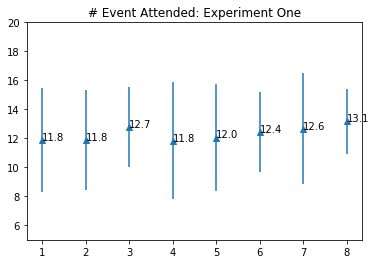

[[ 11.88888889  11.88888889  12.77777778  11.83333333  12.05555556
   12.44444444  12.66666667  13.16666667]
 [  3.60383883   3.47832796   2.73973956   4.04488703   3.71890399
    2.75322482   3.82970843   2.21735578]]


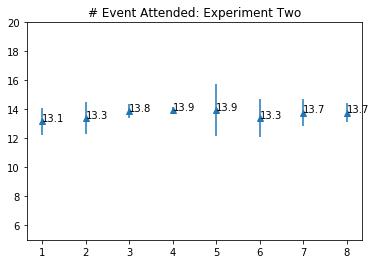

[[ 13.16666667  13.38888889  13.88888889  13.94444444  13.94444444
   13.38888889  13.77777778  13.77777778]
 [  0.95742711   1.11249913   0.45812285   0.22906142   1.77864562
    1.2969575    0.91624569   0.62853936]]


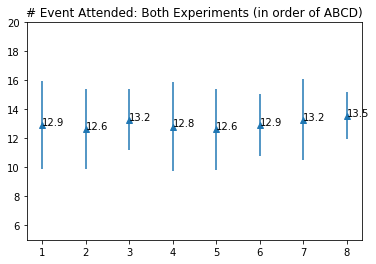

[[ 12.91666667  12.63888889  13.27777778  12.80555556  12.61111111
   12.91666667  13.27777778  13.55555556]
 [  3.02191073   2.73000588   2.1030548    3.05340834   2.77165993
    2.15219526   2.79494694   1.62351547]]


In [24]:
# exp1 mean & std
x = np.arange(8)+1
y = np.array(exp1_attend.mean(axis=0))
e = np.array(exp1_attend.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([5,20])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Event Attended: Experiment One")
plt.show()

print(np.vstack((exp1_attend.mean(axis=0),exp1_attend.std(axis=0))))


# exp2 mean & std
x = np.arange(8)+1
y = np.array(exp2_attend.mean(axis=0))
e = np.array(exp2_attend.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([5,20])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Event Attended: Experiment Two")   
plt.show()

print(np.vstack((exp2_attend.mean(axis=0),exp2_attend.std(axis=0))))


# overall mean & std
x = np.arange(8)+1
y = np.array(exp_attend.mean(axis=0))
e = np.array(exp_attend.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([5,20])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Event Attended: Both Experiments (in order of ABCD)")    
plt.show()

print(np.vstack((exp_attend.mean(axis=0),exp_attend.std(axis=0))))

## RQ1a: # Attended Events between first section with same section in the other exp (ind t-test)

In [25]:
# check if there is a training period

exp_attend_1st_sec = exp1_attend[:, 0].T.ravel()
exp_attend_5th_sec = exp2_attend[:, 4].T.ravel()

print('A-1 Section in exp1: Mean:',exp_attend_1st_sec.mean(),' Std:',exp_attend_1st_sec.std())
print('A-1 Section in exp2: Mean:',exp_attend_5th_sec.mean(),' Std:',exp_attend_5th_sec.std())
print(sp.ttest_ind(exp_attend_1st_sec,exp_attend_5th_sec),'\n')

exp_attend_1st_sec = exp2_attend[:, 0].T.ravel()
exp_attend_5th_sec = exp1_attend[:, 4].T.ravel()

print('C-1 Section in exp2: Mean:',exp_attend_1st_sec.mean(),' Std:',exp_attend_1st_sec.std())
print('C-1 Section in exp1: Mean:',exp_attend_5th_sec.mean(),' Std:',exp_attend_5th_sec.std())
print(sp.ttest_ind(exp_attend_1st_sec,exp_attend_5th_sec))

A-1 Section in exp1: Mean: 11.8888888889  Std: 3.60383883116
A-1 Section in exp2: Mean: 13.9444444444  Std: 1.77864562151
Ttest_indResult(statistic=-2.1088748978086156, pvalue=0.042398612943289948) 

C-1 Section in exp2: Mean: 13.1666666667  Std: 0.957427107756
C-1 Section in exp1: Mean: 12.0555555556  Std: 3.7189039936
Ttest_indResult(statistic=1.1929751125180623, pvalue=0.24113794604744104)


## RQ1b: # Attended Events between first and second section in all stages (related t-test)

In [26]:
# check if there is a training period

exp_attend_sec1 = exp_attend[:, np.r_[0,2,4,6]].T.ravel()
exp_attend_sec2 = exp_attend[:, np.r_[1,3,5,7]].T.ravel()

print('1st Section: Mean:',exp_attend_sec1.mean(),' std:',exp_attend_sec1.std())
print('2nd Section: Mean:',exp_attend_sec2.mean(),' std:',exp_attend_sec2.std())
print(sp.ttest_rel(exp_attend_sec1,exp_attend_sec2))

1st Section: Mean: 13.0208333333  std: 2.70921460021
2nd Section: Mean: 12.9791666667  std: 2.47618868761
Ttest_relResult(statistic=0.22380251489707545, pvalue=0.82323039218543759)


## RQ3 User behaviour vs system performance
### RQ3a # attended events vs system performance
### Number of Attended Events vs System Performance (Hi FA vs Low FA ratio) – related t-test

In [27]:
# within population: high/low false rate

exp_attend_hifalse = exp_attend[:, np.r_[0:4]].T.ravel()
exp_attend_lofalse = exp_attend[:, np.r_[4:8]].T.ravel()

print('Sections with high FA: Mean:', exp_attend_hifalse.mean(),' std:',exp_attend_hifalse.std())
print('Sections with low FA: Mean:', exp_attend_lofalse.mean(),' std:',exp_attend_lofalse.std())
print(sp.ttest_rel(exp_attend_hifalse,exp_attend_lofalse))

Sections with high FA: Mean: 12.9097222222  std: 2.76363587619
Sections with low FA: Mean: 13.0902777778  std: 2.41210257073
Ttest_relResult(statistic=-0.75769795326595579, pvalue=0.44987861809997631)


### RQ3a # attended events vs system performance
### Number of Attended Events vs System Performance (with/without missed events) – related t-test

In [28]:
# within population with/without misses

exp_attend_misses = np.hstack((exp_attend[:,0],exp_attend[:,1],exp_attend[:,4],exp_attend[:,5]))
exp_attend_nomisses = np.hstack((exp_attend[:,2],exp_attend[:,3],exp_attend[:,6],exp_attend[:,7]))

print('Sections with Misses: Mean:', exp_attend_misses.mean(),' std:',exp_attend_misses.std())
print('Sections without Misses: Mean:', exp_attend_nomisses.mean(),' std:',exp_attend_nomisses.std())
print(sp.ttest_rel(exp_attend_misses,exp_attend_nomisses))

Sections with Misses: Mean: 12.7708333333  std: 2.69185693342
Sections without Misses: Mean: 13.2291666667  std: 2.47408442661
Ttest_relResult(statistic=-3.0541386352349011, pvalue=0.0026927395934077392)


## RQ4 User Behaviour versus Self-reported Trust
### RQ4a Correlation between Number of Attended Events and Trust Scores

In [29]:
# pearson correlation
pear_ = sp.pearsonr(exp_trust.T.ravel(), exp_attend.T.ravel())
print('PearsonrResult(correlation=',pear_[0],' pvalue=',pear_[1])
# spearman correlation
print(sp.spearmanr(exp_trust.T.ravel(), exp_attend.T.ravel()),'\n')

PearsonrResult(correlation= 0.125001445122  pvalue= 0.0339687153667
SpearmanrResult(correlation=0.087234605779643398, pvalue=0.13972960838964399) 



# Number of Alerts Attended

In [30]:
exp1_attend_alert = exp1_data_T.values[1:n_participant,280:288].astype(int)
exp2_attend_alert = exp2_data_T.values[1:n_participant,280:288].astype(int)
# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_attend_alert = np.vstack((exp1_attend_alert,np.hstack((exp2_attend_alert[:,4:],exp2_attend_alert[:,:4])))).astype(int)
exp_attend_alert.shape

(36, 8)

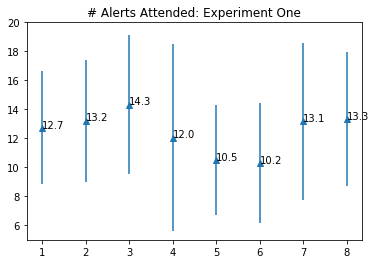

array([[ 12.72222222,  13.22222222,  14.33333333,  12.05555556,
         10.5       ,  10.27777778,  13.16666667,  13.33333333],
       [  3.8987969 ,   4.21051007,   4.8189441 ,   6.4676307 ,
          3.81881308,   4.13394559,   5.38774329,   4.65474668]])

In [31]:
# exp1 mean & std
x = np.arange(8)+1
y = np.array(exp1_attend_alert.mean(axis=0))
e = np.array(exp1_attend_alert.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([5,20])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Alerts Attended: Experiment One")
plt.show()

# exp1 mean & std
np.vstack((exp1_attend_alert.mean(axis=0),exp1_attend_alert.std(axis=0)))

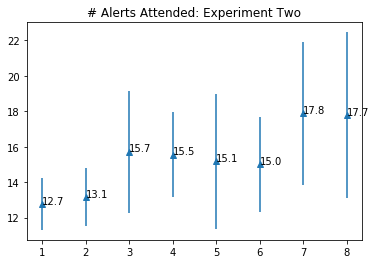

array([[ 12.77777778,  13.16666667,  15.72222222,  15.55555556,
         15.16666667,  15.        ,  17.88888889,  17.77777778],
       [  1.47405546,   1.6414763 ,   3.44489244,   2.40883149,
          3.78960567,   2.66666667,   4.03992421,   4.68514859]])

In [32]:
# exp2 mean & std
x = np.arange(8)+1
y = np.array(exp2_attend_alert.mean(axis=0))
e = np.array(exp2_attend_alert.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
# axes.set_ylim([5,20])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Alerts Attended: Experiment Two")   
plt.show()

# exp2 mean & std
np.vstack((exp2_attend_alert.mean(axis=0),exp2_attend_alert.std(axis=0)))

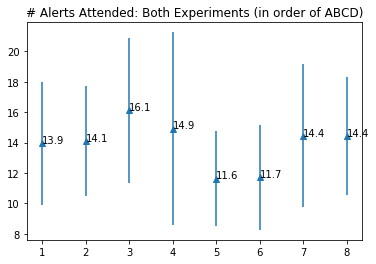

array([[ 13.94444444,  14.11111111,  16.11111111,  14.91666667,
         11.63888889,  11.72222222,  14.44444444,  14.44444444],
       [  4.0341903 ,   3.63453939,   4.7887471 ,   6.33059151,
          3.11049101,   3.46098181,   4.69896232,   3.86899674]])

In [33]:
# overall mean & std
x = np.arange(8)+1
y = np.array(exp_attend_alert.mean(axis=0))
e = np.array(exp_attend_alert.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
# axes.set_ylim([5,20])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Alerts Attended: Both Experiments (in order of ABCD)")    
plt.show()

# overall mean & std
np.vstack((exp_attend_alert.mean(axis=0),exp_attend_alert.std(axis=0)))

## RQ1a: # Attended Alerts between first section with same section in the other exp (ind t-test)

In [34]:
# check if there is a training period

exp_attend_alert_1st_sec = exp1_attend_alert[:, 0].T.ravel()
exp_attend_alert_5th_sec = exp2_attend_alert[:, 4].T.ravel()

print('A-1 Section in exp1: Mean:',exp_attend_alert_1st_sec.mean(),' Std:',exp_attend_alert_1st_sec.std())
print('A-1 Section in exp2: Mean:',exp_attend_alert_5th_sec.mean(),' Std:',exp_attend_alert_5th_sec.std())
print(sp.ttest_ind(exp_attend_alert_1st_sec,exp_attend_alert_5th_sec),'\n')

exp_attend_alert_1st_sec = exp2_attend_alert[:, 0].T.ravel()
exp_attend_alert_5th_sec = exp1_attend_alert[:, 4].T.ravel()

print('C-1 Section in exp2: Mean:',exp_attend_alert_1st_sec.mean(),' Std:',exp_attend_alert_1st_sec.std())
print('C-1 Section in exp1: Mean:',exp_attend_alert_5th_sec.mean(),' Std:',exp_attend_alert_5th_sec.std())
print(sp.ttest_ind(exp_attend_alert_1st_sec,exp_attend_alert_5th_sec))

A-1 Section in exp1: Mean: 12.7222222222  Std: 3.89879690212
A-1 Section in exp2: Mean: 15.1666666667  Std: 3.78960566697
Ttest_indResult(statistic=-1.8537011562312498, pvalue=0.07247518615549392) 

C-1 Section in exp2: Mean: 12.7777777778  Std: 1.47405546238
C-1 Section in exp1: Mean: 10.5  Std: 3.81881307913
Ttest_indResult(statistic=2.2942904458336217, pvalue=0.028075183060318722)


## RQ1b: # Attended Alerts between first and second section in all stages (related t-test)

In [35]:
# check if there is a training period

exp_attend_alert_sec1 = exp_attend_alert[:, np.r_[0,2,4,6]].T.ravel()
exp_attend_alert_sec2 = exp_attend_alert[:, np.r_[1,3,5,7]].T.ravel()

print('1st Section: Mean:',exp_attend_alert_sec1.mean(),' std:',exp_attend_alert_sec1.std())
print('2nd Section: Mean:',exp_attend_alert_sec2.mean(),' std:',exp_attend_alert_sec2.std())
print(sp.ttest_rel(exp_attend_alert_sec1,exp_attend_alert_sec2))

1st Section: Mean: 14.0347222222  std: 4.50526419629
2nd Section: Mean: 13.7986111111  std: 4.64515856252
Ttest_relResult(statistic=0.81413275585229805, pvalue=0.41692254663028094)


### RQ3a # attended events vs system performance
### Proportion of Attended Alerts vs System Performance (high/low false alert rate) – related t-test

In [36]:
# within subject all exps: high/low false rate

exp_attend_alert_hifalse = (exp_attend_alert[:, np.r_[0:4]]/np.array([17,17,20,20])).T.ravel()
exp_attend_alert_lofalse = (exp_attend_alert[:, np.r_[4:8]]/np.array([14,14,17,17])).T.ravel()

print('Sections with high FA: Mean:',exp_attend_alert_hifalse.mean(),' std:',exp_attend_alert_hifalse.std())
print('Sections with low FA: Mean:',exp_attend_alert_lofalse.mean(),' std:',exp_attend_alert_lofalse.std())
print(sp.ttest_rel(exp_attend_alert_hifalse,exp_attend_alert_lofalse))

Sections with high FA: Mean: 0.800428921569  std: 0.256818298231
Sections with low FA: Mean: 0.84199929972  std: 0.244401881868
Ttest_relResult(statistic=-2.0111317563439992, pvalue=0.04619092425070441)


### RQ3a # attended events vs system performance
### Proportion of Attended Alerts vs System Performance (with/without missed events) – related t-test

In [37]:
# within subject all exps: with/without misses

exp_attend_alert_misses = (exp_attend_alert[:, np.r_[0,1,4,5]]/np.array([17,17,14,14])).T.ravel()
exp_attend_alert_nomisses = (exp_attend_alert[:, np.r_[2,3,6,7]]/np.array([20,20,17,17])).T.ravel()
# exp_attend_alert_misses = (np.vstack((exp_attend_alert[:,0],exp_attend_alert[:,1],exp_attend_alert[:,4],exp_attend_alert[:,5])).T/np.array([17,17,14,14])).T.ravel()
# exp_attend_alert_nomisses = (np.vstack((exp_attend_alert[:,2],exp_attend_alert[:,3],exp_attend_alert[:,6],exp_attend_alert[:,7])).T/np.array([20,20,17,17])).T.ravel()


print('Sections with Misses: Mean:',exp_attend_alert_misses.mean(),' Std:',exp_attend_alert_misses.std())
print('Sections without Misses: Mean:',exp_attend_alert_nomisses.mean(),' Std:',exp_attend_alert_nomisses.std())
print(sp.ttest_rel(exp_attend_alert_misses,exp_attend_alert_nomisses))
# print(sp.wilcoxon(exp_attend_alert_misses,exp_attend_alert_nomisses),'\n')


Sections with Misses: Mean: 0.829744397759  Std: 0.230569802413
Sections without Misses: Mean: 0.812683823529  Std: 0.270636289058
Ttest_relResult(statistic=0.95545470406340627, pvalue=0.34096021173705748)


## RQ4 User Behaviour versus Self-reported Trust
### RQ4a Correlation between Proportion of Attended Alerts and Trust Scores

In [38]:
# pearson correlation
pear_ = sp.pearsonr(exp_trust.T.ravel(), (exp_attend_alert/np.array([17,17,20,20,14,14,17,17])).T.ravel())
print('PearsonrResult(correlation=',pear_[0],' pvalue=',pear_[1])
# spearman correlation
print(sp.spearmanr(exp_trust.T.ravel(), (exp_attend_alert/np.array([17,17,20,20,14,14,17,17])).T.ravel()))

PearsonrResult(correlation= 0.103291866293  pvalue= 0.0801215243629
SpearmanrResult(correlation=0.11962199909186257, pvalue=0.042507881685231806)


## RQ4 User Behaviour versus Self-reported Trust
### RQ4a Correlation between Proportion of Attended False Alerts and Trust Scores

In [39]:
exp1_attendf = exp1_data_T.values[1:n_participant,214:222].astype(int)
exp2_attendf = exp2_data_T.values[1:n_participant,214:222].astype(int)
exp_attendf = np.vstack((exp1_attendf,np.hstack((exp2_attendf[:,4:],exp2_attendf[:,:4])))).astype(int)

# pearson correlation
pear_ = sp.pearsonr(exp_trust.T.ravel(), (exp_attendf/np.array([17,17,20,20,14,14,17,17])).T.ravel())
print('PearsonrResult(correlation=',pear_[0],' pvalue=',pear_[1])
# spearman correlation
print(sp.spearmanr(exp_trust.T.ravel(), (exp_attendf/np.array([17,17,20,20,14,14,17,17])).T.ravel()))

PearsonrResult(correlation= -0.23000102178  pvalue= 8.17500082239e-05
SpearmanrResult(correlation=-0.20917320802327183, pvalue=0.00035161609904581865)


# Number of Checks Clicked

In [40]:
exp1_check = exp1_data_T.values[1:n_participant,253:261].astype(int)
exp2_check = exp2_data_T.values[1:n_participant,253:261].astype(int)
# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_check = np.vstack((exp1_check,np.hstack((exp2_check[:,4:],exp2_check[:,:4])))).astype(int)
exp_check.shape

(36, 8)

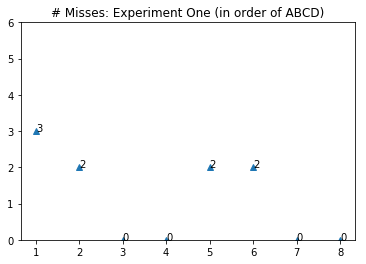

In [41]:
# number of misses
x = np.arange(8)+1
y = np.array([3, 2, 0, 0, 2, 2, 0, 0])
e = np.array([0, 0, 0, 0, 0, 0, 0, 0])

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,6])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Misses: Experiment One (in order of ABCD)")    
plt.show()


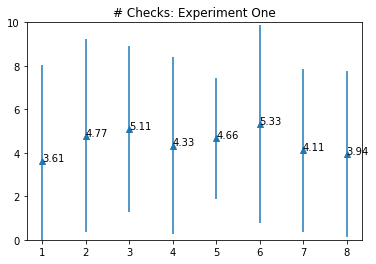

array([[ 3.61111111,  4.77777778,  5.11111111,  4.33333333,  4.66666667,
         5.33333333,  4.11111111,  3.94444444],
       [ 4.41133501,  4.4416658 ,  3.81355607,  4.05517502,  2.78886676,
         4.55826478,  3.75483228,  3.80748126]])

In [42]:
# exp1 mean & std
x = np.arange(8)+1
y = np.array(exp1_check.mean(axis=0))
e = np.array(exp1_check.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,10])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Checks: Experiment One")
plt.show()

# exp1 mean & std
np.vstack((exp1_check.mean(axis=0),exp1_check.std(axis=0)))

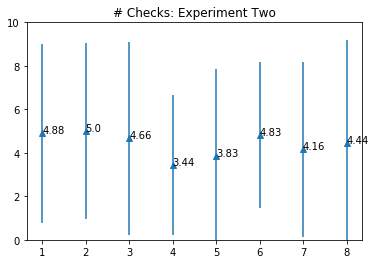

array([[ 4.88888889,  5.        ,  4.66666667,  3.44444444,  3.83333333,
         4.83333333,  4.16666667,  4.44444444],
       [ 4.13506535,  4.05517502,  4.43471157,  3.20108006,  4.0173236 ,
         3.35410197,  4.0173236 ,  4.75186773]])

In [43]:
# exp2 mean & std
x = np.arange(8)+1
y = np.array(exp2_check.mean(axis=0))
e = np.array(exp2_check.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,10])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Checks: Experiment Two")   
plt.show()

# exp2 mean & std
np.vstack((exp2_check.mean(axis=0),exp2_check.std(axis=0)))

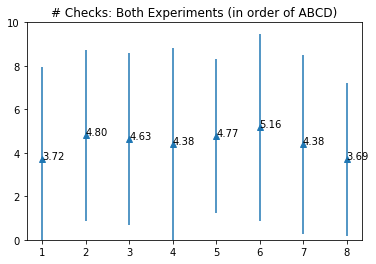

array([[ 3.72222222,  4.80555556,  4.63888889,  4.38888889,  4.77777778,
         5.16666667,  4.38888889,  3.69444444],
       [ 4.22039434,  3.93572981,  3.94512905,  4.41762743,  3.52854322,
         4.31727795,  4.11823707,  3.52624639]])

In [44]:
# overall mean & std
x = np.arange(8)+1
y = np.array(exp_check.mean(axis=0))
e = np.array(exp_check.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,10])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Checks: Both Experiments (in order of ABCD)")    
plt.show()

# overall mean & std
np.vstack((exp_check.mean(axis=0),exp_check.std(axis=0)))

## RQ1a: # Checks between first section with same section in the other exp (ind t-test)

In [45]:
# check if there is a training period

exp_check_1st_sec = exp1_check[:, 0].T.ravel()
exp_check_5th_sec = exp2_check[:, 4].T.ravel()

print('A-1 Section in exp1: Mean:',exp_check_1st_sec.mean(),' Std:',exp_check_1st_sec.std())
print('A-1 Section in exp2: Mean:',exp_check_5th_sec.mean(),' Std:',exp_check_5th_sec.std())
print(sp.ttest_ind(exp_check_1st_sec,exp_check_5th_sec),'\n')

exp_check_1st_sec = exp2_check[:, 0].T.ravel()
exp_check_5th_sec = exp1_check[:, 4].T.ravel()

print('C-1 Section in exp2: Mean:',exp_check_1st_sec.mean(),' Std:',exp_check_1st_sec.std())
print('C-1 Section in exp1: Mean:',exp_check_5th_sec.mean(),' Std:',exp_check_5th_sec.std())
print(sp.ttest_ind(exp_check_1st_sec,exp_check_5th_sec))

A-1 Section in exp1: Mean: 3.61111111111  Std: 4.41133500691
A-1 Section in exp2: Mean: 3.83333333333  Std: 4.01732359773
Ttest_indResult(statistic=-0.15356579007511459, pvalue=0.87885996238143127) 

C-1 Section in exp2: Mean: 4.88888888889  Std: 4.13506534798
C-1 Section in exp1: Mean: 4.66666666667  Std: 2.78886675511
Ttest_indResult(statistic=0.18370328865599367, pvalue=0.85533744016124458)


## RQ1b: #  Checks between first and second section in all stages (related t-test)

In [46]:
# check if there is a training period

exp_check_sec1 = exp_check[:, np.r_[0,2,4,6]].T.ravel()
exp_check_sec2 = exp_check[:, np.r_[1,3,5,7]].T.ravel()

print('1st Section: Mean:',exp_check_sec1.mean(),' std:',exp_check_sec1.std())
print('2nd Section: Mean:',exp_check_sec2.mean(),' std:',exp_check_sec2.std())
print(sp.ttest_rel(exp_check_sec1,exp_check_sec2))

1st Section: Mean: 4.38194444444  std: 3.98259499395
2nd Section: Mean: 4.51388888889  std: 4.10112808179
Ttest_relResult(statistic=-0.52342524210030461, pvalue=0.60148854591036782)


## RQ3b Number of checks on residents vs system performance

### Number of checks between high/low false alert rate (related t-test)

In [47]:
# within population: high/low false rate

exp_check_hifalse = exp_check[:, np.r_[0:4]].T.ravel()
exp_check_lofalse = exp_check[:, np.r_[4:8]].T.ravel()

print('Sections with high FA: Mean:', exp_check_hifalse.mean(),' std:',exp_check_hifalse.std())
print('Sections with low FA: Mean:',exp_check_lofalse.mean(),' std:',exp_check_lofalse.std())
print(sp.ttest_rel(exp_check_hifalse,exp_check_lofalse))
#sp.ttest_ind

Sections with high FA: Mean: 4.38888888889  std: 4.15516932251
Sections with low FA: Mean: 4.50694444444  std: 3.92640018864
Ttest_relResult(statistic=-0.37553829337433181, pvalue=0.70781664351424589)


## RQ3b Number of checks on residents vs system performance

### Number of checks with/without missed events (related t-test)

In [48]:
# within population with/without misses

exp_check_misses = np.hstack((exp_check[:,0],exp_check[:,1],exp_check[:,4],exp_check[:,5]))
exp_check_nomisses = np.hstack((exp_check[:,2],exp_check[:,3],exp_check[:,6],exp_check[:,7]))

print('Sections with Misses: Mean:',exp_check_misses.mean(),' std:',exp_check_misses.std())
print('Sections without Misses: Mean:',exp_check_nomisses.mean(),' std:',exp_check_nomisses.std())
print(sp.ttest_rel(exp_check_misses,exp_check_nomisses))
#sp.ttest_ind

Sections with Misses: Mean: 4.61805555556  std: 4.04831331095
Sections without Misses: Mean: 4.27777777778  std: 4.03017170237
Ttest_relResult(statistic=1.163821170501963, pvalue=0.24643464190164668)


## RQ3b Number of checks vs missed events in the previous segment
### Independent t-test/Wilcoxon signed-ranked test for number of checks in consecutive segments.

In [49]:
# pearson correlation

for sec_i in range(7):
    exp_check_1st=exp_check[:n_participant-1,sec_i]
    exp_check_2nd=exp_check[:n_participant-1,sec_i+1]
    print('Exp1: Sec',sec_i+1,' Mean:',exp_check_1st.mean(),' Std:',exp_check_1st.std())
    print('Exp1: Sec',sec_i+2,' Mean:',exp_check_2nd.mean(),' Std:',exp_check_2nd.std())
    print(sp.ttest_ind(exp_check_1st.T.ravel(), exp_check_2nd.T.ravel()))
    print(sp.wilcoxon(exp_check_1st.T.ravel(), exp_check_2nd.T.ravel()),'\n')
    
for sec_i in range(7):
    exp_check_1st=exp_check[n_participant-1:,sec_i]
    exp_check_2nd=exp_check[n_participant-1:,sec_i+1]
    print('Exp2: Sec',sec_i+1,' Mean:',exp_check_1st.mean(),' Std:',exp_check_1st.std())
    print('Exp2: Sec',sec_i+2,' Mean:',exp_check_2nd.mean(),' Std:',exp_check_2nd.std())
    print(sp.ttest_ind(exp_check_1st.T.ravel(), exp_check_2nd.T.ravel()))
    print(sp.wilcoxon(exp_check_1st.T.ravel(), exp_check_2nd.T.ravel()),'\n')

Exp1: Sec 1  Mean: 3.61111111111  Std: 4.41133500691
Exp1: Sec 2  Mean: 4.77777777778  Std: 4.44166579807
Ttest_indResult(statistic=-0.7684103318255382, pvalue=0.44754811444334464)
WilcoxonResult(statistic=36.5, pvalue=0.18082396332783868) 

Exp1: Sec 2  Mean: 4.77777777778  Std: 4.44166579807
Exp1: Sec 3  Mean: 5.11111111111  Std: 3.81355606705
Ttest_indResult(statistic=-0.23476642386682142, pvalue=0.81579817344143235)
WilcoxonResult(statistic=40.5, pvalue=0.7242514885299367) 

Exp1: Sec 3  Mean: 5.11111111111  Std: 3.81355606705
Exp1: Sec 4  Mean: 4.33333333333  Std: 4.0551750202
Ttest_indResult(statistic=0.57608376991559074, pvalue=0.56835266465584511)
WilcoxonResult(statistic=30.5, pvalue=0.2922869621254035) 

Exp1: Sec 4  Mean: 4.33333333333  Std: 4.0551750202
Exp1: Sec 5  Mean: 4.66666666667  Std: 2.78886675511
Ttest_indResult(statistic=-0.27925194963714589, pvalue=0.78174317754471345)
WilcoxonResult(statistic=57.0, pvalue=0.56510600510745002) 

Exp1: Sec 5  Mean: 4.66666666667  

C:\Users\final\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


## RQ3b Number of checks vs missed events in the previous segment
### Correlation for number of checks in consecutive segments.

In [50]:
# pearson correlation

for sec_i in range(7):
    exp_check_1st=exp_check[:n_participant-1,sec_i]
    exp_check_2nd=exp_check[:n_participant-1,sec_i+1]
    print('Exp1: Sec',sec_i+1,' Mean:',exp_check_1st.mean(),' Std:',exp_check_1st.std())
    print('Exp1: Sec',sec_i+2,' Mean:',exp_check_2nd.mean(),' Std:',exp_check_2nd.std())
    pear_ = sp.pearsonr(exp_check_1st.T.ravel(), exp_check_2nd.T.ravel())
    print('PearsonrResult(correlation=',pear_[0],' pvalue=',pear_[1])
    print(sp.spearmanr(exp_check_1st.T.ravel(), exp_check_2nd.T.ravel()),'\n')

for sec_i in range(7):
    exp_check_1st=exp_check[n_participant-1:,sec_i]
    exp_check_2nd=exp_check[n_participant-1:,sec_i+1]
    print('Exp2: Sec',sec_i+1,sec_i+2)
    print('Exp1: Sec',sec_i+1,' Mean:',exp_check_1st.mean(),' Std:',exp_check_1st.std())
    print('Exp1: Sec',sec_i+2,' Mean:',exp_check_2nd.mean(),' Std:',exp_check_2nd.std())
    pear_ = sp.pearsonr(exp_check_1st.T.ravel(), exp_check_2nd.T.ravel())
    print('PearsonrResult(correlation=',pear_[0],' pvalue=',pear_[1])
    print(sp.spearmanr(exp_check_1st.T.ravel(), exp_check_2nd.T.ravel()),'\n')

Exp1: Sec 1  Mean: 3.61111111111  Std: 4.41133500691
Exp1: Sec 2  Mean: 4.77777777778  Std: 4.44166579807
PearsonrResult(correlation= 0.630714971624  pvalue= 0.00500996184357
SpearmanrResult(correlation=0.50365091584892907, pvalue=0.033094314261581215) 

Exp1: Sec 2  Mean: 4.77777777778  Std: 4.44166579807
Exp1: Sec 3  Mean: 5.11111111111  Std: 3.81355606705
PearsonrResult(correlation= 0.765658351554  pvalue= 0.000212502046831
SpearmanrResult(correlation=0.69515382028347494, pvalue=0.0013623826738295272) 

Exp1: Sec 3  Mean: 5.11111111111  Std: 3.81355606705
Exp1: Sec 4  Mean: 4.33333333333  Std: 4.0551750202
PearsonrResult(correlation= 0.608317364589  pvalue= 0.00739120542305
SpearmanrResult(correlation=0.8067184739247073, pvalue=5.2340676195597627e-05) 

Exp1: Sec 4  Mean: 4.33333333333  Std: 4.0551750202
Exp1: Sec 5  Mean: 4.66666666667  Std: 2.78886675511
PearsonrResult(correlation= 0.638606712162  pvalue= 0.00433784319595
SpearmanrResult(correlation=0.68000037673161517, pvalue=0.0

In [51]:
# # Correlation between # Checks and previous misses

# # pearson correlation
# exp_check_ = exp_check[:,1:]
# num_miss = np.multiply(np.ones(exp_check_.shape),[3,2,0,0,2,2,0])

# print(num_miss.mean(),num_miss.std())
# print(exp_check_.mean(),exp_check_.std())
# pear_ = sp.pearsonr(num_miss.T.ravel(), exp_check_.T.ravel())
# print('PearsonrResult(correlation=',pear_[0],', pvalue=',pear_[1])
# print(sp.spearmanr(num_miss.T.ravel(), exp_check_.T.ravel()))

## RQ3b Number of checks vs missed events in the previous segment
### plots for number of checks in consecutive segments.

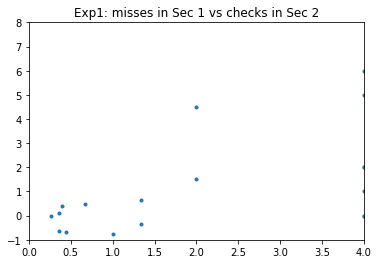

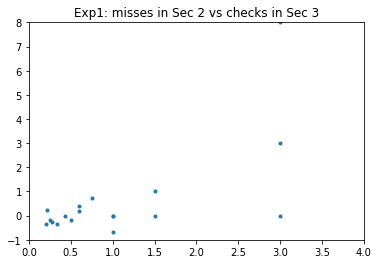

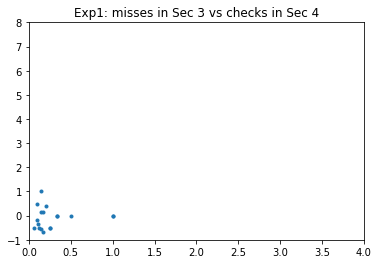

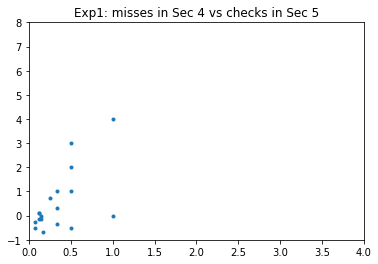

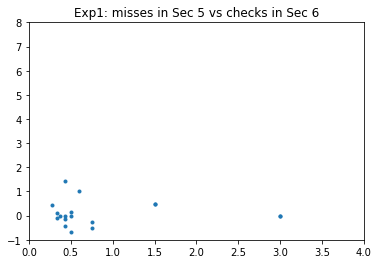

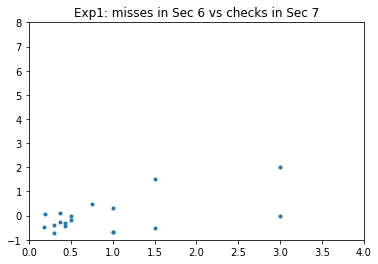

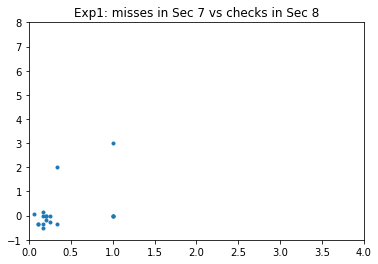

In [52]:
# Correlation between # Checks and previous misses

num_miss = np.array([3,2,0,0,2,2,0])

for sec_i in range(7):
    sys = (num_miss[sec_i]+1)/(exp1_check[:,sec_i]+1)
    check_chgs = (exp1_check[:,sec_i+1]-exp1_check[:,sec_i])/(exp1_check[:,sec_i]+1)
    plt.figure()
    axes = plt.gca()
    axes.set_ylim([-1,8])
    axes.set_xlim([0,4])
    plt.scatter(sys, check_chgs, marker='.')
    plt.title('Exp1: misses in Sec %s vs checks in Sec %s' %(sec_i+1,sec_i+2))   
    plt.show()

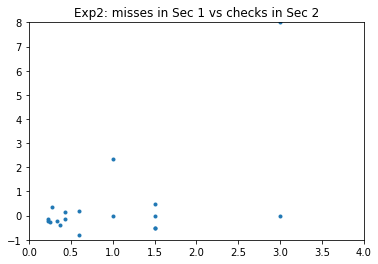

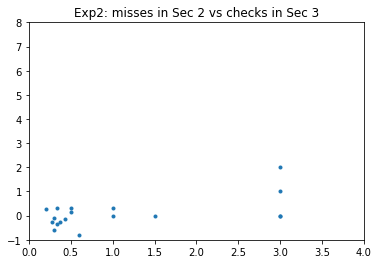

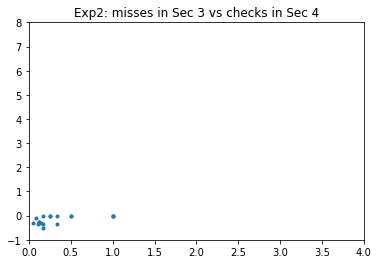

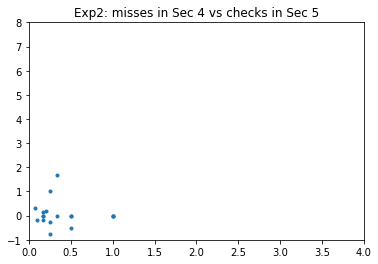

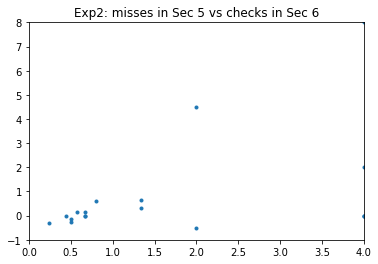

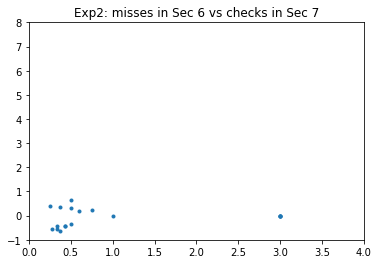

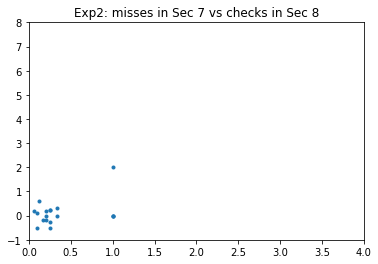

In [53]:
num_miss = np.array([2,2,0,0,3,2,0])

for sec_i in range(7):
    sys = (num_miss[sec_i]+1)/(exp2_check[:,sec_i]+1)
    check_chgs = (exp2_check[:,sec_i+1]-exp2_check[:,sec_i])/(exp2_check[:,sec_i]+1)
    plt.figure()
    axes = plt.gca()
    axes.set_ylim([-1,8])
    axes.set_xlim([0,4])
    plt.scatter(sys, check_chgs, marker='.')
    plt.title('Exp2: misses in Sec %s vs checks in Sec %s' %(sec_i+1,sec_i+2))   
    plt.show()

## RQ4 User Behaviour versus Self-reported Trust
### RQ4b Correlation between Number of Checks and Trust Scores

In [54]:
# pearson correlation
pear_ = sp.pearsonr(exp_trust.T.ravel(), exp_check.T.ravel())
print('PearsonrResult(correlation=',pear_[0],' pvalue=',pear_[1])
# spearman correlation
print(sp.spearmanr(exp_trust.T.ravel(), exp_check.T.ravel()))

PearsonrResult(correlation= 0.106161292227  pvalue= 0.0720395095479
SpearmanrResult(correlation=0.13062483676714454, pvalue=0.026647558055093695)


# Num of Admin Tasks

In [55]:
exp1_admin = exp1_data_T.values[1:n_participant,94:102].astype(int)
exp2_admin = exp2_data_T.values[1:n_participant,94:102].astype(int)
# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_admin = np.vstack((exp1_admin,np.hstack((exp2_admin[:,4:],exp2_admin[:,:4])))).astype(int)
exp_admin.shape

(36, 8)

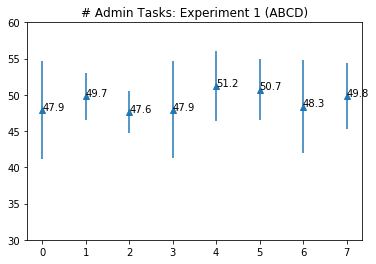

array([[ 47.94444444,  49.77777778,  47.61111111,  47.94444444,
         51.22222222,  50.72222222,  48.38888889,  49.83333333],
       [  6.77800546,   3.18948891,   2.92762492,   6.72038542,
          4.82534461,   4.22697101,   6.46476681,   4.51232879]])

In [56]:
# exp1 mean & std
x = np.arange(8)
y = np.array(exp1_admin.mean(axis=0))
e = np.array(exp1_admin.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([30,60])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
    
plt.title("# Admin Tasks: Experiment 1 (ABCD)")    
plt.show()

# exp1 mean & std
np.vstack((exp1_admin.mean(axis=0),exp1_admin.std(axis=0)))

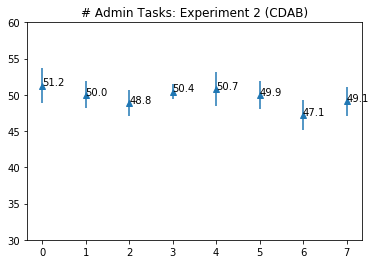

array([[ 51.27777778,  50.        ,  48.88888889,  50.44444444,
         50.77777778,  49.94444444,  47.16666667,  49.11111111],
       [  2.42224771,   1.85592145,   1.76033106,   1.06574034,
          2.34652356,   1.92850611,   2.06155281,   1.96889391]])

In [57]:
# exp2 mean & std
x = np.arange(8)
y = np.array(exp2_admin.mean(axis=0))
e = np.array(exp2_admin.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([30,60])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')

plt.title("# Admin Tasks: Experiment 2 (CDAB)")    
plt.show()

# exp2 mean & std
np.vstack((exp2_admin.mean(axis=0),exp2_admin.std(axis=0)))

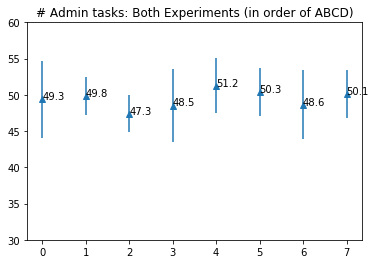

array([[ 49.36111111,  49.86111111,  47.38888889,  48.52777778,
         51.25      ,  50.36111111,  48.63888889,  50.13888889],
       [  5.26599562,   2.63684131,   2.54162872,   4.98601439,
          3.81790373,   3.28424503,   4.74431108,   3.29269206]])

In [58]:
# overall mean & std
x = np.arange(8)
y = np.array(exp_admin.mean(axis=0))
e = np.array(exp_admin.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([30,60])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Admin tasks: Both Experiments (in order of ABCD)")    
plt.show()

# overall mean & std
np.vstack((exp_admin.mean(axis=0),exp_admin.std(axis=0)))

## Correlation between # Attended Admins vs # Attended Alerts

In [59]:
# pearson correlation
sp.pearsonr(exp_admin.T.ravel(), exp_attend_alert.ravel())

(0.031108671550072704, 0.59905290181491599)

In [60]:
# spearman correlation
sp.spearmanr(exp_admin.T.ravel(), exp_attend_alert.ravel())

SpearmanrResult(correlation=0.068171904042508238, pvalue=0.24881752375667182)

# Selected report frequency 

In [61]:
exp1_freq = exp1_data_T.values[1:n_participant,88:92]
index, exp1_freq_temp =np.unique(exp1_freq.ravel(), return_inverse=True)
print(np.arange(len(index)))
print(index)
exp1_freq = np.reshape(exp1_freq_temp,exp1_freq.shape).astype(int)

exp2_freq = exp2_data_T.values[1:n_participant,88:92]
index, exp2_freq_temp =np.unique(exp2_freq.ravel(), return_inverse=True)
print(np.arange(len(index)))
print(index)
exp2_freq = np.reshape(exp2_freq_temp,exp2_freq.shape).astype(int)

exp_freq = np.vstack((exp1_freq,np.hstack((exp2_freq[:,2:],exp2_freq[:,:2])))).astype(int)
exp_freq.shape

[0 1 2]
['Disabled' 'High' 'Low']
[0 1 2]
['Disabled' 'High' 'Low']


(36, 4)

# Earnings & Losses

In [62]:
exp1_admin_w = exp1_data_T.values[1:n_participant,114:122].astype(int)
exp2_admin_w = exp2_data_T.values[1:n_participant,114:122].astype(int)
exp_admin_w = np.vstack((exp1_admin_w,np.hstack((exp2_admin_w[:,4:],exp2_admin_w[:,:4])))).astype(int)

# correct cards:$4 
# wrong cards: $4
# use (total admin - 2x wrong admin)x$4 to get net profit
Earnings_admin = 4*(exp_admin - 2*exp_admin_w)

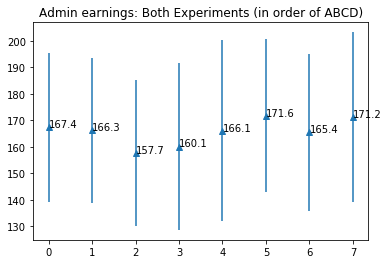

array([[ 167.44444444,  166.33333333,  157.77777778,  160.11111111,
         166.11111111,  171.66666667,  165.44444444,  171.22222222],
       [  28.0658397 ,   27.33130074,   27.57526177,   31.41812797,
          33.99981845,   28.86558889,   29.59208269,   31.99749219]])

In [63]:
# overall mean & std
x = np.arange(8)
y = np.array(Earnings_admin.mean(axis=0))
e = np.array(Earnings_admin.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
# axes.set_ylim([30,60])

for xy in zip(x, y):
    axes.annotate('%.5s' % xy[1], xy=xy, textcoords='data')
plt.title("Admin earnings: Both Experiments (in order of ABCD)")    
plt.show()

# overall mean & std
np.vstack((Earnings_admin.mean(axis=0),Earnings_admin.std(axis=0)))

In [64]:
# final balance
exp1_fnl_balance = exp1_data_T.values[1:n_participant,244:252].astype(int)
exp2_fnl_balance = exp2_data_T.values[1:n_participant,244:252].astype(int)
# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_fnl_balance = np.vstack((exp1_fnl_balance,np.hstack((exp2_fnl_balance[:,4:],exp2_fnl_balance[:,:4])))).astype(int)

# reverse engineering to find total losses from monitoring system
Total_loss = exp_fnl_balance - Earnings_admin - 150

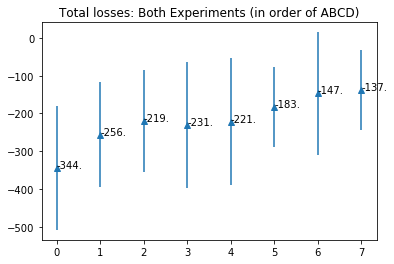

array([[-344.38888889, -256.41666667, -219.27777778, -231.22222222,
        -221.69444444, -183.91666667, -147.05555556, -137.55555556],
       [ 164.07235494,  139.32862333,  134.51385949,  167.24933335,
         168.04179696,  105.87003957,  162.24500411,  106.54848777]])

In [65]:
# overall mean & std
x = np.arange(8)
y = np.array(Total_loss.mean(axis=0))
e = np.array(Total_loss.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
# axes.set_ylim([30,60])

for xy in zip(x, y):
    axes.annotate('%.5s' % xy[1], xy=xy, textcoords='data')
plt.title("Total losses: Both Experiments (in order of ABCD)")    
plt.show()

# overall mean & std
np.vstack((Total_loss.mean(axis=0),Total_loss.std(axis=0)))

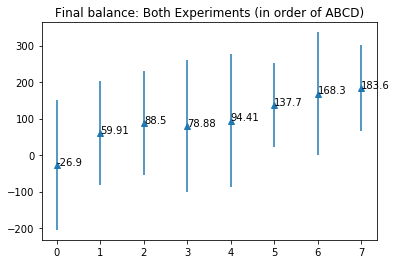

array([[ -26.94444444,   59.91666667,   88.5       ,   78.88888889,
          94.41666667,  137.75      ,  168.38888889,  183.66666667],
       [ 177.89665296,  143.01231008,  142.56080574,  181.06333726,
         182.2936238 ,  114.60933038,  168.03162364,  118.62546101]])

In [66]:
# overall mean & std
x = np.arange(8)
y = np.array(exp_fnl_balance.mean(axis=0))
e = np.array(exp_fnl_balance.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
# axes.set_ylim([30,60])

for xy in zip(x, y):
    axes.annotate('%.5s' % xy[1], xy=xy, textcoords='data')
plt.title("Final balance: Both Experiments (in order of ABCD)")    
plt.show()

# overall mean & std
np.vstack((exp_fnl_balance.mean(axis=0),exp_fnl_balance.std(axis=0)))

# Propensity Questions

In [67]:
exp1_prop = exp1_data_T.values[1:n_participant,9:15].astype(int)
exp2_prop = exp2_data_T.values[1:n_participant,9:15].astype(int)
# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_prop = np.vstack((exp1_prop,np.hstack((exp2_prop[:,4:],exp2_prop[:,:4])))).astype(int)

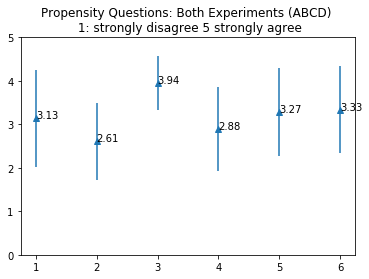

array([[ 3.13888889,  2.61111111,  3.94444444,  2.88888889,  3.27777778,
         3.33333333],
       [ 1.10937364,  0.89062331,  0.62112999,  0.96545262,  1.01683362,
         1.        ]])

In [68]:
# overall mean & std
x = np.arange(6)+1
y = np.array(exp_prop.mean(axis=0))
e = np.array(exp_prop.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,5])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("Propensity Questions: Both Experiments (ABCD) \n 1: strongly disagree 5 strongly agree")    
plt.show()

# overall mean & std
np.vstack((exp_prop.mean(axis=0),exp_prop.std(axis=0)))

# Post-stage Questions

In [69]:
# exp1_pstq = np.hstack((exp1_data_T.values[1:n_participant,16:19],exp1_data_T.values[1:n_participant,21:28],
#                        exp1_data_T.values[1:n_participant,29:32],exp1_data_T.values[1:n_participant,34:41],
#                        exp1_data_T.values[1:n_participant,42:45],exp1_data_T.values[1:n_participant,47:54],
#                        exp1_data_T.values[1:n_participant,55:58],exp1_data_T.values[1:n_participant,60:67])).astype(int)
# exp2_pstq = np.hstack((exp2_data_T.values[1:n_participant,16:19],exp2_data_T.values[1:n_participant,21:28],
#                        exp2_data_T.values[1:n_participant,29:32],exp2_data_T.values[1:n_participant,34:41],
#                        exp2_data_T.values[1:n_participant,42:45],exp2_data_T.values[1:n_participant,47:54],
#                        exp2_data_T.values[1:n_participant,55:58],exp2_data_T.values[1:n_participant,60:67])).astype(int)

exp1_pstq = exp1_data_T.values[1:n_participant, np.r_[16:19,21:28,29:32,34:41,42:45,47:54,55:58,60:67]].astype(int)
exp2_pstq = exp2_data_T.values[1:n_participant, np.r_[16:19,21:28,29:32,34:41,42:45,47:54,55:58,60:67]].astype(int)

# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_pstq = np.vstack((exp1_pstq,np.hstack((exp2_pstq[:,20:],exp2_pstq[:,:20])))).astype(int)

In [70]:
exp_pstq.shape

(36, 40)

In [71]:
# overall mean & std
np.vstack((exp_pstq.mean(axis=0),exp_pstq.std(axis=0)))

array([[ 4.30555556,  3.13888889,  3.36111111,  3.08333333,  3.61111111,
         3.5       ,  3.        ,  2.88888889,  2.72222222,  3.63888889,
         4.22222222,  2.88888889,  3.19444444,  3.25      ,  3.66666667,
         3.66666667,  3.19444444,  3.11111111,  2.63888889,  3.75      ,
         4.25      ,  3.13888889,  2.94444444,  3.75      ,  3.91666667,
         3.88888889,  3.47222222,  3.38888889,  2.58333333,  3.83333333,
         4.27777778,  3.13888889,  2.75      ,  3.77777778,  3.86111111,
         3.91666667,  3.58333333,  3.55555556,  2.5       ,  3.94444444],
       [ 0.99497193,  1.18210682,  0.6730023 ,  0.8291562 ,  0.82589271,
         0.72648316,  0.94280904,  0.99380799,  0.83702884,  0.6303781 ,
         1.08297715,  1.24225999,  0.69997795,  0.89365044,  0.8819171 ,
         0.81649658,  0.90736017,  1.04822013,  0.8548157 ,  0.7592028 ,
         0.98248551,  1.13413643,  0.66434782,  0.72168784,  0.64009548,
         0.6983225 ,  0.79882244,  0.95095793,  0.

In [72]:
# exp1 mean & std
np.vstack((exp1_pstq.mean(axis=0),exp1_pstq.std(axis=0)))

array([[ 4.27777778,  2.94444444,  3.27777778,  3.16666667,  3.55555556,
         3.61111111,  3.16666667,  2.94444444,  2.55555556,  3.77777778,
         4.        ,  2.77777778,  3.27777778,  3.22222222,  3.55555556,
         3.72222222,  3.27777778,  3.16666667,  2.77777778,  3.61111111,
         4.        ,  3.11111111,  2.77777778,  3.83333333,  4.        ,
         4.        ,  3.5       ,  3.55555556,  2.61111111,  4.        ,
         4.11111111,  3.27777778,  2.77777778,  3.77777778,  3.83333333,
         3.83333333,  3.55555556,  3.5       ,  2.55555556,  3.94444444],
       [ 0.80315735,  1.02589918,  0.65026111,  0.76376262,  0.89580642,
         0.59056366,  0.89752747,  0.84801875,  0.68493489,  0.53287017,
         1.05409255,  1.18112731,  0.73071925,  0.91624569,  1.0122704 ,
         0.86958199,  0.86958199,  0.95742711,  0.91624569,  0.95095793,
         1.24721913,  1.24225999,  0.71145825,  0.60092521,  0.66666667,
         0.57735027,  0.76376262,  0.83147942,  0.

In [73]:
# exp2 mean & std
np.vstack((exp2_pstq.mean(axis=0),exp2_pstq.std(axis=0)))

array([[ 4.5       ,  3.16666667,  3.11111111,  3.66666667,  3.83333333,
         3.77777778,  3.44444444,  3.22222222,  2.55555556,  3.66666667,
         4.44444444,  3.        ,  2.72222222,  3.77777778,  3.88888889,
         4.        ,  3.61111111,  3.61111111,  2.44444444,  3.94444444,
         4.33333333,  3.33333333,  3.44444444,  3.        ,  3.66666667,
         3.38888889,  2.83333333,  2.83333333,  2.88888889,  3.5       ,
         4.44444444,  3.        ,  3.11111111,  3.27777778,  3.77777778,
         3.61111111,  3.11111111,  3.05555556,  2.5       ,  3.88888889],
       [ 0.5       ,  1.01379376,  0.56655772,  0.81649658,  0.60092521,
         0.7856742 ,  0.83147942,  1.03040206,  0.95581392,  0.57735027,
         1.11665285,  1.24721913,  0.73071925,  0.85346064,  0.6573422 ,
         0.66666667,  0.89062331,  1.11249913,  0.7617394 ,  0.70492097,
         1.15470054,  1.29099445,  0.68493489,  0.8819171 ,  0.74535599,
         0.82589271,  0.95742711,  1.11803399,  0.

## RQ2a Opinion about the system & system performance
### Difference between answers to S3, S4, S7, S8, -S9 (inverse) and System Performance (Hi FA vs Low FA ratio) – Wilcoxon signed-ranked test

In [74]:
Q_id = np.array([3,4,7,8,9])-1

In [75]:
Qs = [
'How often did you attend to the system\'s alerts?',
'How often did you check on the residents?',
'How much do you think this monitoring system needs to improve so you won\'t feel the need to check on residents at all?',
'I can rely on this monitoring system to function properly',
'I know how to use this monitoring system to perform well (even if I don\'t know exactly how it works)',
'I know how to use this monitoring system to take care of the residents (even if I don\'t know exactly how it works)', 
'This monitoring system is dependable',
'I would use such a monitoring system for an elderly family member',
'This monitoring system\'s actions will have a harmful outcome',
'My decisions were the most appropriate ones']

In [76]:
for ids in Q_id: 
    pstq = exp_pstq[:,np.arange(ids,40,10)]
    pstq_set1 = pstq[:, [0,1]].T.ravel()
    pstq_set2 = pstq[:, [2,3]].T.ravel()
    print(ids+1,Qs[ids])
    print('Sections with high FA: Mean:', pstq_set1.mean(),' Std:',pstq_set1.std(),' Median:',np.median(pstq_set1))
    print('Sections with low FA: Mean:', pstq_set2.mean(),' Std:',pstq_set2.std(),' Median:',np.median(pstq_set2))
    print(sp.wilcoxon(pstq_set1,pstq_set2))
    print('\n')

3 How much do you think this monitoring system needs to improve so you won't feel the need to check on residents at all?
Sections with high FA: Mean: 3.27777777778  Std: 0.691661088777  Median: 3.0
Sections with low FA: Mean: 2.84722222222  Std: 0.680272049792  Median: 3.0
WilcoxonResult(statistic=75.0, pvalue=2.3129253702380791e-05)


4 I can rely on this monitoring system to function properly
Sections with high FA: Mean: 3.16666666667  Std: 0.866025403784  Median: 3.0
Sections with low FA: Mean: 3.76388888889  Std: 0.790447404174  Median: 4.0
WilcoxonResult(statistic=55.5, pvalue=3.4931357255314674e-06)


7 This monitoring system is dependable
Sections with high FA: Mean: 3.09722222222  Std: 0.930348235612  Median: 3.0
Sections with low FA: Mean: 3.52777777778  Std: 0.816023934532  Median: 4.0
WilcoxonResult(statistic=112.0, pvalue=0.0001422838609300976)


8 I would use such a monitoring system for an elderly family member
Sections with high FA: Mean: 3.0  Std: 1.02740233383  Median:

## RQ2a Opinion about the system & system performance
### Answers to S3, S4, S7, -S9 (inverse) and System Performance (with/without missed events) – Wilcoxon signed-ranked test

In [77]:
for ids in Q_id: 
    pstq = exp_pstq[:,np.arange(ids,40,10)]
    pstq_set1 = pstq[:, [0,2]].T.ravel()
    pstq_set2 = pstq[:, [1,3]].T.ravel()
    print(ids+1,Qs[ids])
    print('Sections with misses: Mean:', pstq_set1.mean(),' Std:',pstq_set1.std(),' Median:',np.median(pstq_set1))
    print('Sections without misses: Mean:', pstq_set2.mean(),' Std:',pstq_set2.std(),' Median:',np.median(pstq_set2))
    print(sp.wilcoxon(pstq_set1,pstq_set2))
    print('\n')

3 How much do you think this monitoring system needs to improve so you won't feel the need to check on residents at all?
Sections with misses: Mean: 3.15277777778  Std: 0.700391204618  Median: 3.0
Sections without misses: Mean: 2.97222222222  Std: 0.725951908076  Median: 3.0
WilcoxonResult(statistic=286.0, pvalue=0.063939089307543814)


4 I can rely on this monitoring system to function properly
Sections with misses: Mean: 3.41666666667  Std: 0.845740963758  Median: 4.0
Sections without misses: Mean: 3.51388888889  Std: 0.912765266703  Median: 4.0
WilcoxonResult(statistic=162.0, pvalue=0.3161562050651987)


7 This monitoring system is dependable
Sections with misses: Mean: 3.23611111111  Std: 0.905125153341  Median: 3.5
Sections without misses: Mean: 3.38888888889  Std: 0.890623307882  Median: 4.0
WilcoxonResult(statistic=201.0, pvalue=0.12730937393838346)


8 I would use such a monitoring system for an elderly family member
Sections with misses: Mean: 3.13888888889  Std: 1.00423486014

# Post-game Questions

In [78]:
exp1_pgq = exp1_data_T.values[1:n_participant,69:76]
exp2_pgq = exp2_data_T.values[1:n_participant,69:76]
exp_pgq = np.vstack((exp1_pgq,exp2_pgq)).astype(int)
exp_pgq.shape

(36, 7)

[2 3 4 5]


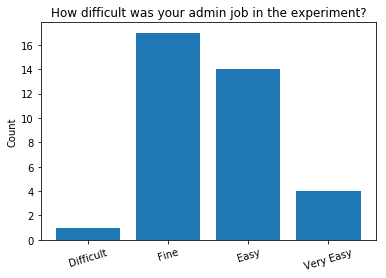

(None, Counter({2: 1, 3: 17, 4: 14, 5: 4}))

In [79]:
pg1 = Counter(exp_pgq[:,0])
print(np.array(sorted(pg1.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(pg1.keys()))
plt.bar(x, np.array(sorted(pg1.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Difficult','Fine','Easy','Very Easy'),
           rotation=17)
plt.title("How difficult was your admin job in the experiment?")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_pgq[:,0]))

[1 2 3 4 5]


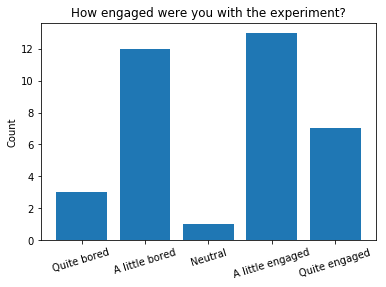

(None, Counter({1: 3, 2: 12, 3: 1, 4: 13, 5: 7}))

In [80]:
pg2 = Counter(exp_pgq[:,1])
print(np.array(sorted(pg2.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(pg2.keys()))
plt.bar(x, np.array(sorted(pg2.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Quite bored','A little bored','Neutral','A little engaged','Quite engaged'),
           rotation=17)
plt.title("How engaged were you with the experiment?")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_pgq[:,1]))

In [81]:
pg3 = Counter(exp_pgq[:,2])
print(np.array(sorted(pg3.items(), key= lambda t: (t[0]), reverse=False))[:,0])

[1 2 3]


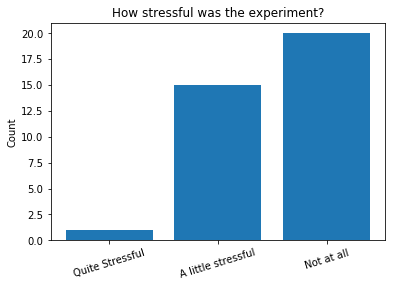

(None, Counter({1: 1, 2: 15, 3: 20}))

In [82]:
x = np.arange(len(pg3.keys()))
plt.bar(x, np.array(sorted(pg3.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Quite Stressful','A little stressful','Not at all'),
           rotation=17)
plt.title("How stressful was the experiment?")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_pgq[:,2]))

In [83]:
pg4 = Counter(exp_pgq[:,3])
print(np.array(sorted(pg4.items(), key= lambda t: (t[0]), reverse=False))[:,0])

[1 2 3 4]


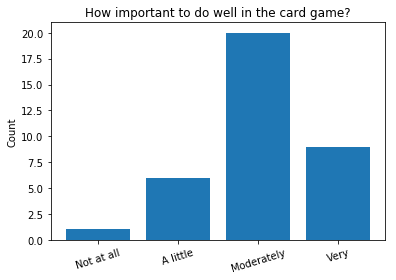

(None, Counter({1: 1, 2: 6, 3: 20, 4: 9}))

In [84]:
x = np.arange(len(pg4.keys()))
plt.bar(x, np.array(sorted(pg4.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Not at all','A little','Moderately','Very'),
           rotation=17)
plt.title("How important to do well in the card game?")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_pgq[:,3]))

In [85]:
pg5 = Counter(exp_pgq[:,4])
print(np.array(sorted(pg5.items(), key= lambda t: (t[0]), reverse=False))[:,0])

[2 3 4]


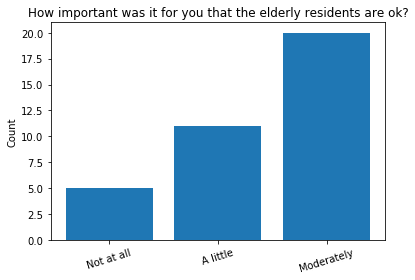

(None, Counter({2: 5, 3: 11, 4: 20}))

In [86]:
x = np.arange(len(pg5.keys()))
plt.bar(x, np.array(sorted(pg5.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Not at all','A little','Moderately','Very'),
           rotation=17)
plt.title("How important was it for you that the elderly residents are ok?")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_pgq[:,4]))

In [87]:
pg6 = Counter(exp_pgq[:,5])
print(np.array(sorted(pg6.items(), key= lambda t: (t[0]), reverse=False))[:,0])

[1 2 3]


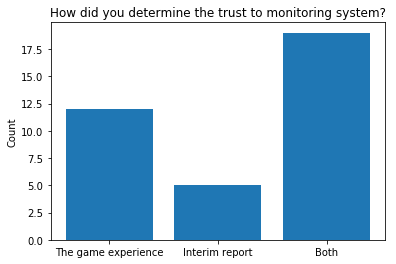

(None, Counter({1: 12, 2: 5, 3: 19}))

In [88]:
x = np.arange(len(pg6.keys()))
plt.bar(x, np.array(sorted(pg6.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('The game experience','Interim report','Both'),
           rotation=0)
plt.title("How did you determine the trust to monitoring system?")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_pgq[:,5]))

In [89]:
pg7 = Counter(exp_pgq[:,6])
print(np.array(sorted(pg7.items(), key= lambda t: (t[0]), reverse=False))[:,0])

[2]


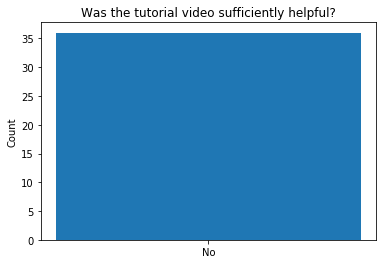

(None, Counter({2: 36}))

In [90]:
x = np.arange(len(pg7.keys()))
plt.bar(x, np.array(sorted(pg7.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('No','Yes'))
plt.title("Was the tutorial video sufficiently helpful?")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_pgq[:,6]))